In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
from dtw import dtw, dtw_improved, dtw_ln, accelerated_dtw
from testing import TestFactory
from models import Autoregression
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial import distance

In [2]:
tests = TestFactory(random_state=42)
X = tests.set_sample(10)

In [3]:
ar_models = []
window_size = 10

for series in X:
    ar = Autoregression(series.loc[:, :"ECoG_ch3"], window_size)
    ar.fit(10)
    ar_models.append(ar.coeffecients())

Loss: 57552.516
Loss: 4421.775
Loss: 52183.969
Loss: 4156.270
Loss: 58862.844
Loss: 7361.530
Loss: 22687.178
Loss: 4140.229
Loss: 44369.160
Loss: 2411.386
Loss: 56403.727
Loss: 2870.446
Loss: 126775.047
Loss: 3576.645
Loss: 45209.066
Loss: 3540.055
Loss: 30873.062
Loss: 3006.229
Loss: 51945.211
Loss: 4399.160


In [4]:
coeffs = []
for series in ar_models:
    coeff = [np.array(np.concatenate([x.detach().numpy() for x in chanel], axis=0)) for chanel in series]
    coeffs.append(np.concatenate(coeff, axis=0))
coeffs = np.array(coeffs)

In [5]:
Z = linkage(coeffs, metric=distance.euclidean)

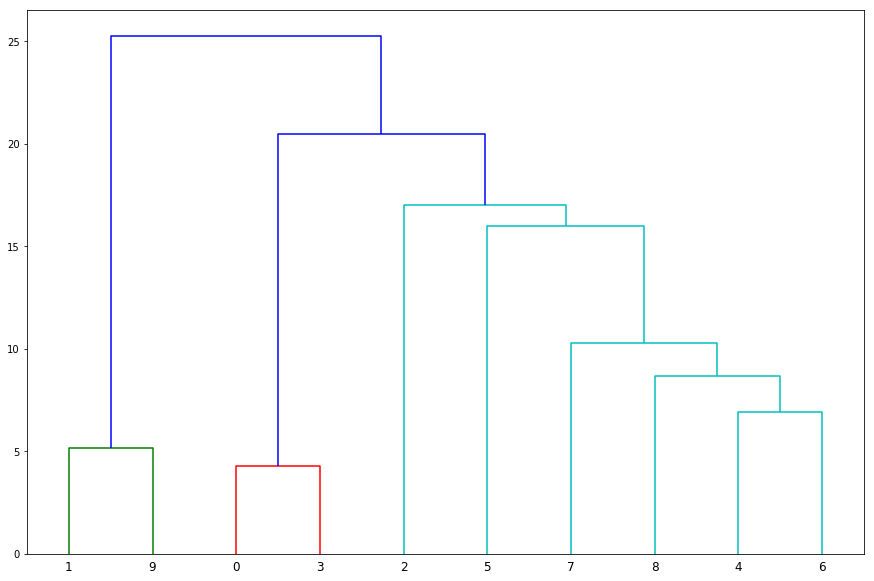

In [6]:
fig = plt.figure(figsize=(15, 10))
dn = dendrogram(Z)

In [7]:
cluster_num = 3
clusters_labels = fcluster(Z, cluster_num, criterion='maxclust')

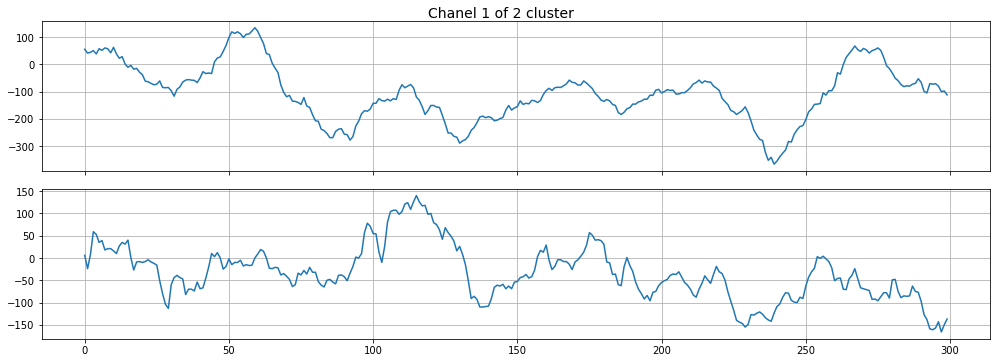

In [8]:
tests.show_clustered(Z, clusters_labels, label=2, ch=1)